In [1]:
import numpy as np
import scipy as sp

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')


import warnings

In [2]:
print 'numpy version: %s' % np.__version__
print 'scipy version: %s' % sp.__version__
print 'matplotlib version: %s' % matplotlib.__version__

numpy version: 1.10.4
scipy version: 0.17.0
matplotlib version: 1.5.1


In [3]:
warnings.filterwarnings('ignore')

# Our first (tiny) machine learning application

In [4]:
data = sp.genfromtxt('data/web_traffic.tsv', delimiter='\t')
print data.shape
data[:10]

(743L, 2L)


array([[  1.00000000e+00,   2.27200000e+03],
       [  2.00000000e+00,              nan],
       [  3.00000000e+00,   1.38600000e+03],
       [  4.00000000e+00,   1.36500000e+03],
       [  5.00000000e+00,   1.48800000e+03],
       [  6.00000000e+00,   1.33700000e+03],
       [  7.00000000e+00,   1.88300000e+03],
       [  8.00000000e+00,   2.28300000e+03],
       [  9.00000000e+00,   1.33500000e+03],
       [  1.00000000e+01,   1.02500000e+03]])

In [5]:
x = data[:, 0]
y = data[:, 1]

sp.sum(sp.isnan(y))

8

In [6]:
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

x.shape, y.shape

((735L,), (735L,))

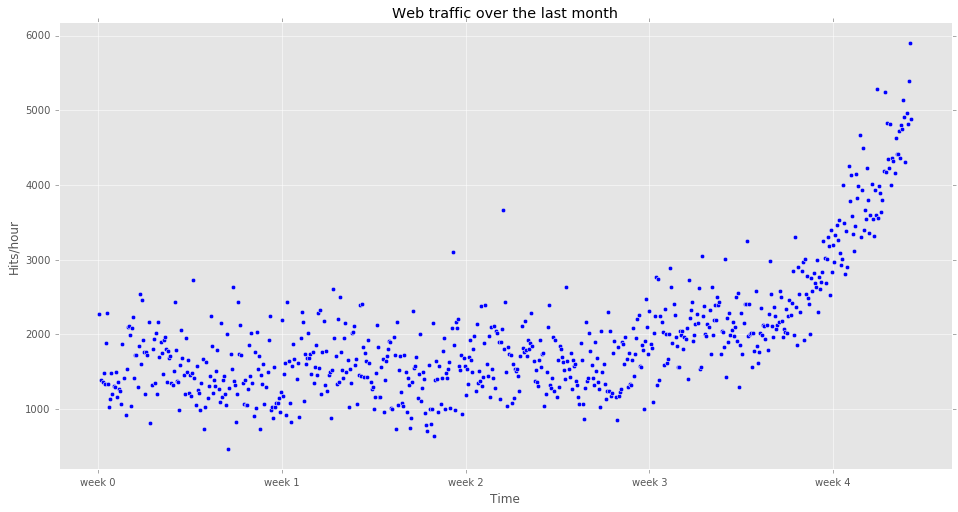

In [7]:
plt.figure(figsize=(16,8))
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(b=True)
plt.show()

In [8]:
# square distance error
def error(f, x, y):
    return sp.sum((f(x)-y)**2)

In [9]:
# straight line
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)
print("Model parameters: %s" % fp1)
print residuals

Model parameters: [   2.59619213  989.02487106]
[  3.17389767e+08]


In [10]:
# This means that the best straight line fit is the following function:
# f(x) = 2.59619213 * x + 989.02487106

f1 = sp.poly1d(fp1, variable='x')
print "formula: %s" % f1
print "error: %f" % (error(f1, x, y))

formula:  
2.596 x + 989
error: 317389767.339778


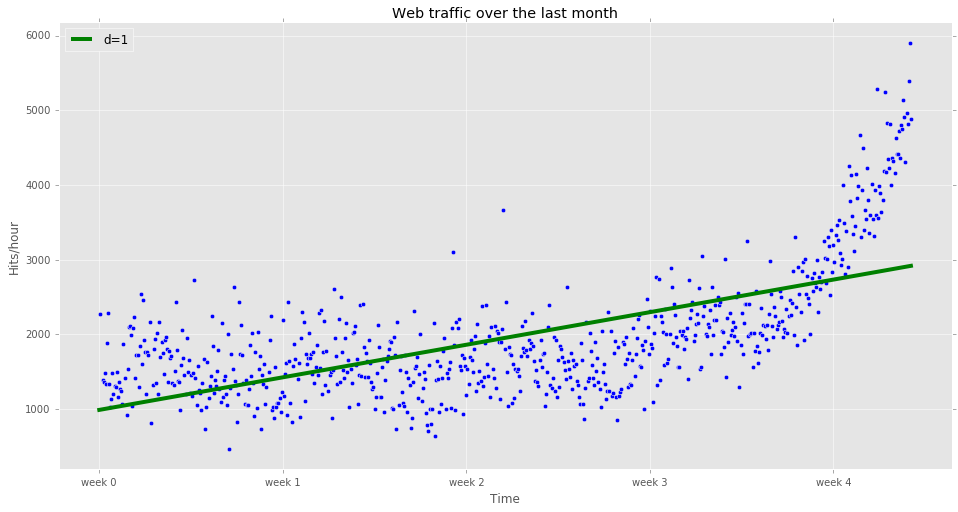

In [11]:
plt.figure(figsize=(16,8))
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(b=True)

fx = sp.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=4, color='g')
plt.legend(["d=%i" % f1.order], loc="upper left")

plt.show()

In [12]:
# polynomial fit
f2p = sp.polyfit(x, y, 2)
print f2p

[  1.05322215e-02  -5.26545650e+00   1.97476082e+03]


In [13]:
f2 = sp.poly1d(f2p)
print f2
print(error(f2, x, y))

         2
0.01053 x - 5.265 x + 1975
179983507.878


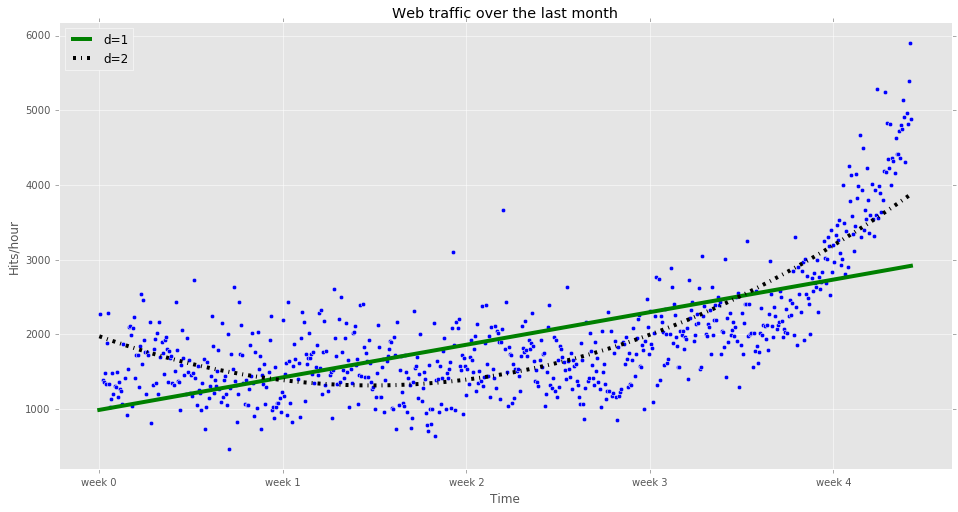

In [14]:
plt.figure(figsize=(16,8))
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(b=True)

fx = sp.linspace(0,x[-1], 1000) # generate X-values for plotting

label = "d=%i" % f1.order
plt.plot(fx, f1(fx), linewidth=4, color='g', label=label)

label = "d=%i" % f2.order
plt.plot(fx, f2(fx), 'k-.', linewidth=4, label=label)

plt.legend(loc="upper left")
plt.show()

In [15]:
degrees = [1, 2, 3, 10, 100]
line_styles = ['-', '-.', '--', ':', '-']
colors = ['g', 'k', 'b', 'm', 'r']

for d in degrees:
    print d, colors[degrees.index(d)]+line_styles[degrees.index(d)]

1 g-
2 k-.
3 b--
10 m:
100 r-


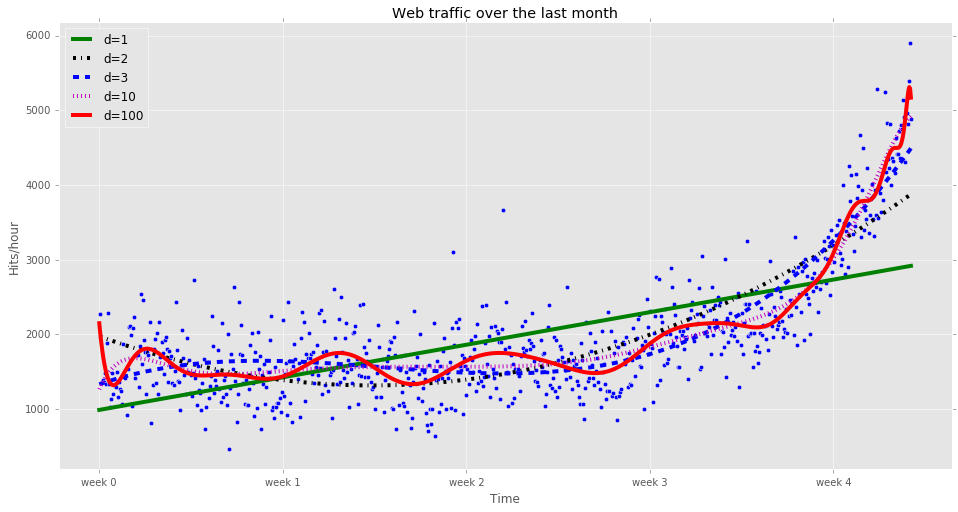

In [16]:
plt.figure(figsize=(16,8))
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(b=True)

fx = sp.linspace(0,x[-1], 1000) # generate X-values for plotting

for d in degrees:
    
    fp_d = sp.polyfit(x, y, d)
    f_d = sp.poly1d(fp_d)
    
    label = "d=%i" % d
    plt.plot(fx, f_d(fx), colors[degrees.index(d)]+line_styles[degrees.index(d)],
             linewidth=4, label=label)


plt.legend(loc="upper left")
plt.show()

In [17]:
for d in degrees:
    fp_d = sp.polyfit(x, y, d)
    f_d = sp.poly1d(fp_d)
    print "Error d=%i: %s" % (d, '{0:,.2f}'.format(error(f_d, x, y)))

Error d=1: 317,389,767.34
Error d=2: 179,983,507.88
Error d=3: 139,350,144.03
Error d=10: 121,942,326.36
Error d=100: 109,452,411.77


## Stepping back to go forward – another look at our data

So, we step back and take another look at the data. It seems that there is an inflection
point between weeks 3 and 4. So let us separate the data and train two lines using
week 3.5 as a separation point. We train the first line with the data up to week 3, and
the second line with the remaining data.

In [18]:
inflection = 3.5*7*24 # calculate the inflection point in hours
xa = x[:inflection] # data before the inflection point
ya = y[:inflection]
xb = x[inflection:] # data after
yb = y[inflection:]

fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))

fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)
print("Error inflection = %s" % '{0:,.2f}'.format(fa_error + fb_error))


# Error inflection=156,639,407.701523; as noted by text, there are obviously some discrepencies

Error inflection = 132,950,348.20


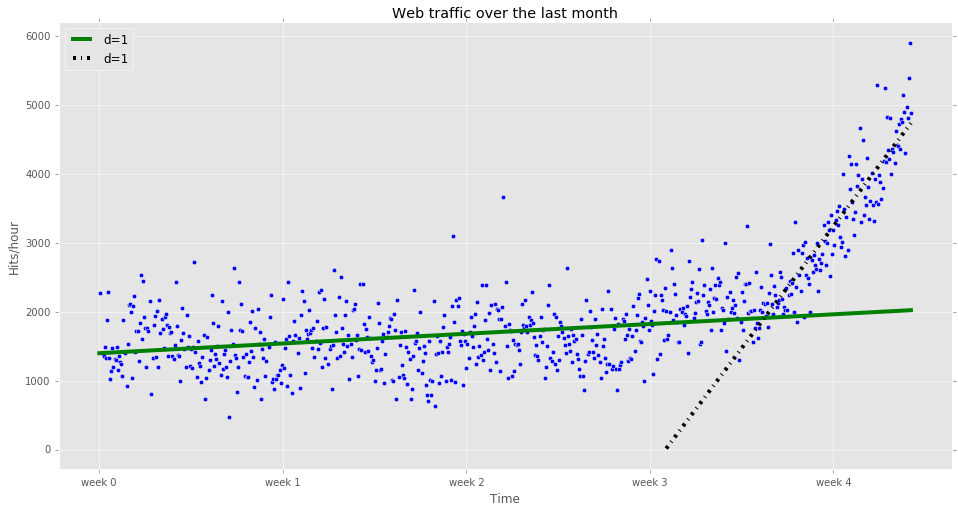

In [19]:
plt.figure(figsize=(16,8))
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(b=True)

fx = sp.linspace(0,x[-1], 1000) # generate X-values for plotting
fx2 = sp.linspace(x[fb(x) > 0][0],x[-1], 1000) # generate X-values for alternate plot

label = "d=%i" % fa.order
plt.plot(fx, fa(fx), 'g-', linewidth=4, label=label)

label = "d=%i" % fb.order
plt.plot(fx2, fb(fx2), 'k-.', linewidth=4, label=label)

plt.legend(loc="upper left")
plt.show()

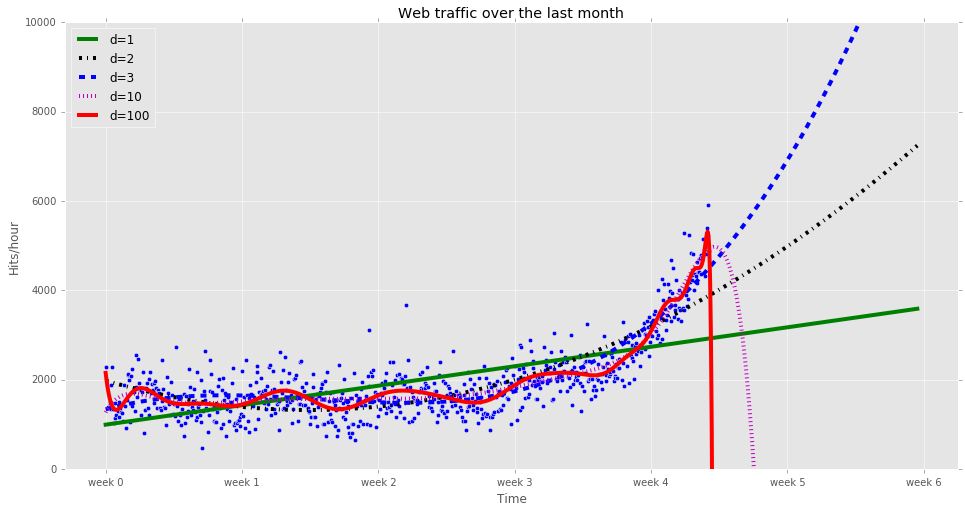

In [20]:
plt.figure(figsize=(16,8))
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(b=True)
plt.ylim(0,10000)

fx = sp.linspace(0,1000, 1000) # generate X-values for plotting

for d in degrees:
    
    fp_d = sp.polyfit(x, y, d)
    f_d = sp.poly1d(fp_d)
    
    label = "d=%i" % d
    plt.plot(fx, f_d(fx), colors[degrees.index(d)]+line_styles[degrees.index(d)],
             linewidth=4, label=label)


plt.legend(loc="upper left")
plt.show()

So let us play fair to the models of degree 2 and above and try out how they behave
if we fit them only to the data of the last week. After all, we believe that the last
week says more about the future than the data before.

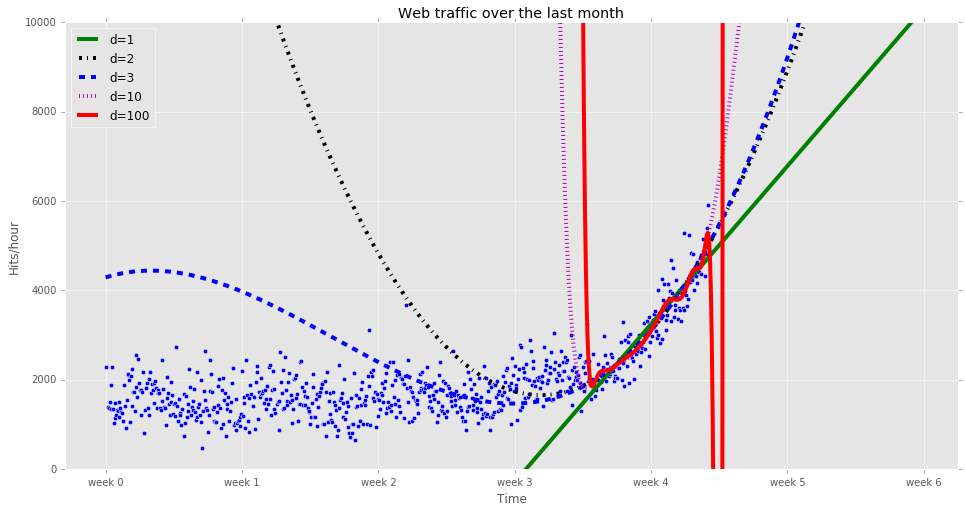

In [21]:
plt.figure(figsize=(16,8))
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(b=True)
plt.ylim(0,10000)

fx = sp.linspace(0,1000, 1000) # generate X-values for plotting

for d in degrees:
    
#     fp_d = sp.polyfit(x, y, d)
#     xb = x[inflection:] # data after
#     yb = y[inflection:]
    fp_d = sp.polyfit(xb, yb, d)
    f_d = sp.poly1d(fp_d)
    
    label = "d=%i" % d
    plt.plot(fx, f_d(fx), colors[degrees.index(d)]+line_styles[degrees.index(d)],
             linewidth=4, label=label)


plt.legend(loc="upper left")
plt.show()

In [22]:
# trained only on inflection week
# error on all data
for d in degrees:
#     fp_d = sp.polyfit(xb, yb, d)
#     f_d = sp.poly1d(fp_d)
    fb_d = sp.poly1d(sp.polyfit(xb, yb, d))
    print "Error d=%i: %s" % (d, '{0:,.2f}'.format(error(fb_d, xb, yb)))

Error d=1: 22,143,941.11
Error d=2: 19,768,846.99
Error d=3: 19,766,452.36
Error d=10: 18,949,296.78
Error d=100: 18,300,791.40


In [23]:
frac = 0.3
split_idx = int(frac * len(xb))
shuffled = sp.random.permutation(list(range(len(xb))))
# print shuffled

test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])

fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))
fbt3 = sp.poly1d(sp.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(sp.polyfit(xb[train], yb[train], 10))
fbt100 = sp.poly1d(sp.polyfit(xb[train], yb[train], 100))

print("Test errors for only the time after inflection point")
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    print("Error d=%i: %.2f" % (f.order, error(f, xb[test], yb[test])))

Test errors for only the time after inflection point
Error d=1: 8337955.14
Error d=2: 7700489.79
Error d=3: 7806588.60
Error d=10: 8070967.60
Error d=53: 8125401.60


## Answering our initial question

Finally, we have arrived at a model that we think represents the underlying process
best; it is now a simple task of finding out when our infrastructure will reach 100,000
requests per hour. We have to calculate when our model function reaches the value
100,000.

In [24]:
print fbt2

         2
0.07992 x - 86.24 x + 2.497e+04


In [25]:
print fbt2 - 100000

         2
0.07992 x - 86.24 x - 7.503e+04


In [26]:
from scipy.optimize import fsolve

reached_max = fsolve(fbt2-100000, 800)/(7*24)
print("100,000 hits/hour expected at week %f" % reached_max[0])

100,000 hits/hour expected at week 9.812748


## exploring fsolve
source: https://www.youtube.com/watch?v=v4R6K4RxADE

[ 1.60849528]
[-3.10849528]


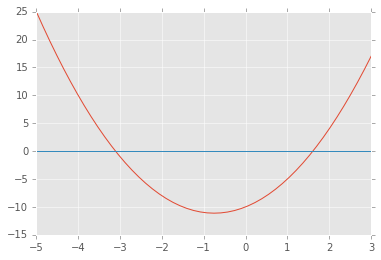

In [27]:
def f(x):
    y = 2.0 * x**2 + 3.0*x - 10.0
    return y

x = np.linspace(-5,3)

plt.plot(x, f(x))
plt.plot(x, np.zeros(len(x)))

x = fsolve(f, 1.0)
print x

x = fsolve(f, -2)
print x

<img src="img/apmonitor_fsolve_p2.PNG" />

In [28]:
def f2(z):
    x = z[0]
    y = z[1]
    f = 2.0 * x**(2.0/3.0) + y**(2.0/3.0) - 9.0**(1.0/3.0)
    g = x**2/4.0 + y**(0.5) - 1.0
    return [f, g]

print f2([1,1])
z = fsolve(f2, [1.0, 1.0])
print z
print f2(z)

[0.9199161769480959, 0.25]
[ 0.4312399   0.90917758]
[-2.6645352591003757e-15, 1.3322676295501878e-15]


set([0.0008767394323459239, 0.0, 2.2561824748175883, -0.00068649055471260842, 0.0071873828381861758, 0.0028295230872463226, 2.2561824748175892, 0.0025697649537510525, -0.00322359598001579, -0.0040706119281791906])
[ 2.25618247]
[  1.59872116e-14]


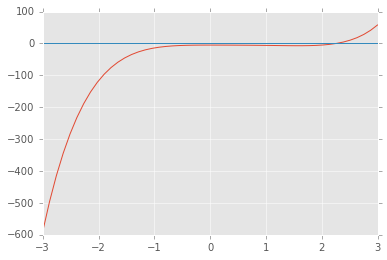

In [29]:
# source: http://www.sosmath.com/algebra/factor/fac03/fac03.html

def f3(x):
    y = x**5 - 3.0 * x**4 + 3.0 * x**3 - 2.0 * x**2 - 5
    return y

x = np.linspace(-3,3)

plt.plot(x, f3(x))
plt.plot(x, np.ones(len(x)))

f3_solve = []
for x in np.linspace(-1, 2, 10):
    f3_solve.append(fsolve(f3, x)[0])
    
print set(f3_solve)
z = fsolve(f3,2)
print z
print f3(z)